# 1. IMPORT TENSORFLOW


In [3]:
import tensorflow as tf

print("Using TensorFlow version", tf.__version__)

Using TensorFlow version 2.1.0


# 2. THE DATASET

## Import MNIST 

In [4]:
from tensorflow.keras.datasets import mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 31s 3us/step


## Shapes of Imported Arrays

In [16]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test.shape: (10000,)


## Plot an Image Example

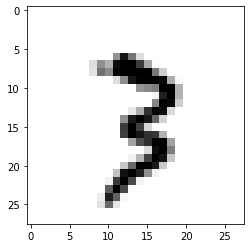

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[25000], cmap="binary")
plt.show()

## Display Labels

In [11]:
#Checking Correct Label
y_train[25000]

3

In [12]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# 3. ONE HOT ENCODING

After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will ber set to 1,rest will be 0:

| original label | one-hot encoded label |
| :------: | :------: |
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0,] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0,] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 1, 0, 0,] |

## Encoding Labels

In [13]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## Validated Shapes

In [15]:
print("y_train_encoded shape:",y_train_encoded.shape)
print("x_test_encoded shape:",y_test_encoded.shape)

y_train_encoded shape: (60000, 10)
x_test_encoded shape: (10000, 10)


## Display Encoded Labels

In [17]:
y_train_encoded[25000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 4. Preprocessing the Examples

## Unrolling N-dimensional Arrays to Vectors

In [18]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000,784))
x_test_reshaped = np.reshape(x_test, (10000,784))

print("x_train_reshaped shape:",x_train_reshaped.shape)
print("x_test_reshaped shape:",x_test_reshaped.shape)

x_train_reshaped shape: (60000, 784)
x_test_reshaped shape: (10000, 784)


## Display Pixel Values

In [19]:
print(set(x_train_reshaped[25000]))

{0, 129, 2, 1, 133, 6, 137, 10, 140, 12, 14, 18, 148, 150, 24, 153, 25, 27, 158, 31, 160, 33, 36, 37, 41, 43, 175, 48, 50, 180, 55, 183, 57, 61, 190, 191, 192, 195, 199, 73, 75, 203, 77, 205, 78, 208, 82, 83, 87, 221, 93, 225, 227, 230, 232, 233, 106, 234, 108, 235, 237, 111, 112, 241, 239, 243, 117, 245, 246, 122, 251, 252, 254}


## Data Normalization

In [20]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

## Display Normalized Pixel Values

In [21]:
print(set(x_train_norm[25000]))

{-0.4240738943910262, 0.9505404661120763, 2.5288013985415647, -0.004052839792855978, 1.3196498777286503, 0.9887241983482736, 0.5559752330047044, 2.6433525952501564, 2.8088154349403447, 2.057868700961798, 1.0650916628206684, 2.694264238231753, 2.3887943803421745, 2.706992148977152, 2.668808416740955, 2.019684968725601, 0.75962180493109, -0.19497150097384247, 1.1287312165476637, 0.09777044617033681, 1.4596568959280403, 0.505063590023108, 0.18686582138813052, 1.803310486053816, 1.4851127174188385, 0.5305194115139061, 2.7706317027041476, 2.1596919869249906, 2.7833596134495466, 2.1087803439433945, 2.465161844814569, 2.439706023323771, -0.10587612575604877, 1.2178265917654574, 1.5232964496550359, 1.8669500397808114, 0.5687031437501034, -0.41134598364562713, -0.39861807290022805, -0.08042030426525057, 0.9250846446212782, 0.2123216428789287, 0.12322626766113501, -0.029508661283654175, 1.9051337720170087, 1.5869360033820312, 0.2759611966059242, 2.5415293092869637, 2.5033455770507667, 2.55425722

# 5. Creating a Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation="relu", input_shape= (784,)),
    Dense(128, activation="relu"),
    Dense(10,activation="softmax")
])

## Compile the Model

In [24]:
model.compile(
    optimizer = "sgd", #stochastic gradient descent
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# 6. Training the Model

In [31]:
model.fit(x_train_norm, y_train_encoded, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0078 - accuracy: 0.9993
Epoch 2/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0072 - accuracy: 0.9994
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0067 - accuracy: 0.9995
Epoch 4/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0061 - accuracy: 0.9997
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0057 - accuracy: 0.9997
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0053 - accuracy: 0.9998
Epoch 7/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0049 - accuracy: 0.9998
Epoch 8/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0046 - accuracy: 0.9999
Epoch 9/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0043 - accuracy: 0.9998
Epoch 10/10
60

## Evaluating the Model

In [33]:
loss, accuracy = model.evaluate(x_test_norm,y_test_encoded)
print("Test set accuracy:",accuracy*100 )

10000/10000 [==============================] - 1s 53us/sample - loss: 0.0805 - accuracy: 0.9792
Test set accuracy: 97.9200005531311


# 7. Predictions

## Predictions on Test Set

In [34]:
preds = model.predict(x_test_norm)
print("Shape of Preds:", preds.shape)

Shape of Preds: (10000, 10)


## Plotting the Results

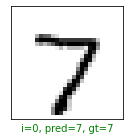

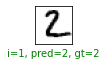

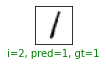

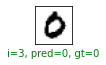

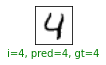

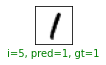

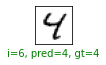

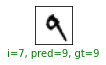

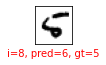

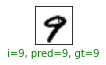

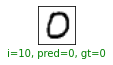

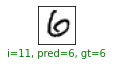

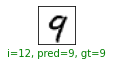

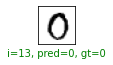

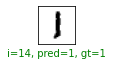

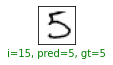

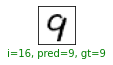

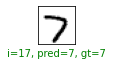

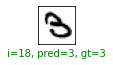

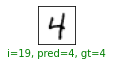

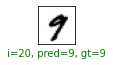

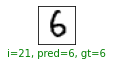

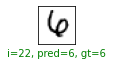

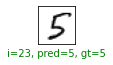

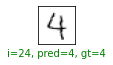

In [38]:
plt.figure(figsize=(12,12))

start_index = 0

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index+i] #ground truth
    
    col = "g"
    if(pred != gt):
        col = "r"
    
    plt.xlabel("i={}, pred={}, gt={}".format(start_index+i,pred,gt),color= col)
    plt.imshow(x_test[start_index+i], cmap="binary")

    plt.show()

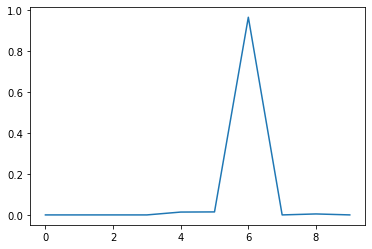

In [40]:
# i=8 showed inaccurate result, lets view its predictions
plt.plot(preds[8])
plt.show()